<h2 style="color:#22198A">PROJECT INFO</h2>

<h3 style="color:green">About project-03</h3>
<p> In this project, we use sample of data from ISIC challenge 2017 in order to build a new dataset describing features of image lesions. More speciffically, we focus on Assymetry, border irregularity and color. Finally, we use these features to investigate the following two research questions:</p>
<ul>
<li>Given the extracted features, how well can we distinguish between healthy and melanoma lesion?</li>
<li>Given the extracted features, how well can we distinguish between healthy and keratosis lesion?</li>
</ul>
<p><b>Contact:</b> jtih@itu.dk, joap@itu.dk, luci@itu.dk</p>
<p><b>Created:</b> 06. 04. 2021</p>
<p><b>Last modified:</b> 22. 04. 2021 </p>

<h2 style="color:#22198A">NOTEBOOK SETUP</h2>
<p>Before you start working with the notebook, please make sure to go through this setup to ensure smooth running. (by default, no changes should be needed if you just downloaded the repository)</p>
<h3 style="color:green">Important highlights</h3>
<ul>
<li><b>BASE_DIR:</b> This should lead to the root directory relative to the location of this notebook</li>
<li><b>SCRIPTS IMPORT:</b> All scripts are saved within one file. In the file, there are comments splitting the whole file into sections which gather scripts with similar functionality, e.g. loading data. All functions should contain a docstring, which might be useful for any troubleshooting or just knowing how the given thing was implemented. The way the scripts are imported was implemented according to <a href='# https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
'>this</a> SO question. <b>Once you run the below cell, all scripts should be loaded.</b></li>
<li><b>PACKAGES USED WITHIN DIRECTORY: </b> In <b>all_scripts.py</b> you can see in the beginning all the packages used, but it is worth highlight these "not so standard" packages which you should make sure you have installed: <b>pandas, scipy.</b></li>
</ul>

In [1]:
# Needed imports for the setup
import os
import sys

# Notebook setup
BASE_DIR = f""
USE_DEEPNOTE = True # In case you would open this notebook via Deepnote

# SCRIPTS IMPORT
scripts_path = os.path.abspath(os.path.join(f'{BASE_DIR}scripts'))

if scripts_path not in sys.path:
    # Add the scripts to the path
    sys.path.append(scripts_path)
    
    # Import the needed scripts
    from all_scripts import *
    
    # Remove the added path to avoid possible future conflicts
    sys.path.remove(scripts_path)
else:
    
    # Import the needed scripts
    from all_scripts import *
    
    # Remove the added path to avoid possible future conflicts
    sys.path.remove(scripts_path)

<h2 style="color:#22198A">CONSTANTS</h2>

In [2]:
PATH_DATA = {
    "raw": f"{BASE_DIR}data{os.sep}raw{os.sep}",
    "processed": f"{BASE_DIR}data{os.sep}processed{os.sep}"
}

FILENAMES = {
    "GT_train_ISIC_2017": "ISIC-2017_Training_Part3_GroundTruth.csv",
    "GT_validate_ISIC_2017": "ISIC-2017_Validation_Part3_GroundTruth.csv",
    "GT_test_ISIC_2017": "ISIC-2017_Test_v2_Part3_GroundTruth.csv",
    "model_input_mel": "model_input_mel.csv",
    "model_input_ker": "model_input_ker.csv",
    "model_input_mel_imb": "model_input_mel_imb.csv",
    "model_input_ker_imb": "model_input_ker_imb.csv"
}

<h2 style="color:#22198A">LOAD DATA</h2>

In [3]:
 all_dfs_raw = {
    "train": pd.read_csv(f"{PATH_DATA['raw']}{FILENAMES['GT_train_ISIC_2017']}"),
    "validate": pd.read_csv(f"{PATH_DATA['raw']}{FILENAMES['GT_validate_ISIC_2017']}"),
    "test": pd.read_csv(f"{PATH_DATA['raw']}{FILENAMES['GT_test_ISIC_2017']}")
}

<h2 style="color:#22198A"> Clean data, extract features, prepare model input</h2>
<h3 style="color:green">Brief summary</h3>
<ul>
<li><b>Source of data:</b> The data comes from the <a href = 'https://challenge.isic-archive.com/landing/2017'>2017 ISIC challenge.</a></li>
</ul>

<h3 style="color:green">Initial exploration</h3>

<h4 style="color:#ff9900">Shape</h4>

In [4]:
for name_df, df in all_dfs_raw.items():
    print(f"{name_df}: {df.shape}")

train: (2000, 3)
validate: (150, 3)
test: (600, 3)


<h4 style="color:#ff9900">Are there any missing values?</h4>

In [5]:
for name_df, df in all_dfs_raw.items():
    print(f"{name_df}:\n{df.isnull().sum()}\n")

train:
image_id                0
melanoma                0
seborrheic_keratosis    0
dtype: int64

validate:
image_id                0
melanoma                0
seborrheic_keratosis    0
dtype: int64

test:
image_id                0
melanoma                0
seborrheic_keratosis    0
dtype: int64



<h4 style="color:#ff9900">What are the variable names?</h4>

In [6]:
for name_df, df in all_dfs_raw.items():
    print(f"{name_df}:\n{list(df.columns)}\n")

train:
['image_id', 'melanoma', 'seborrheic_keratosis']

validate:
['image_id', 'melanoma', 'seborrheic_keratosis']

test:
['image_id', 'melanoma', 'seborrheic_keratosis']



<h4 style="color:#ff9900">Can the same image contain example of both skin cancers?</h4>
No.

In [7]:
for name_df, df in all_dfs_raw.items():
    count_both = sum((df["melanoma"] + df["seborrheic_keratosis"]) > 2)
    print(f"{name_df}:\n{count_both}\n")

train:
0

validate:
0

test:
0



<h3 style="color:green">Explore the distribution of data</h3>

<h4 style="color:#ff9900">How many melanomas examples are there?</h4>

In [8]:
for name_df, df in all_dfs_raw.items():
    print(f"{name_df}:\n{sum(df['melanoma'])/df.shape[0]*100} %\n")

train:
18.7 %

validate:
20.0 %

test:
19.5 %



<h4 style="color:#ff9900">How many keratosis examples are there?</h4>

In [9]:
for name_df, df in all_dfs_raw.items():
    print(f"{name_df}:\n{sum(df['seborrheic_keratosis'])/df.shape[0]*100} %\n")

<h4 style="color:#ff9900">How many healthy examples are there?</h4>

In [10]:
for name_df, df in all_dfs_raw.items():
    healthy = 1 - (sum(df['seborrheic_keratosis'])/df.shape[0] +  sum(df['melanoma'])/df.shape[0])
    print(f"{name_df}:\n{healthy*100} %\n")

train:
68.6 %

validate:
52.0 %

test:
65.5 %



<h3 style="color:green">Merge all the datasets into one</h3>

In [11]:
all_data = all_dfs_raw["train"].append(all_dfs_raw["validate"], ignore_index=True).append(all_dfs_raw["test"], ignore_index=True)

# Make sure index is from 0 to N - 1
all_data.reset_index(drop=True, inplace=True)

# Show the shape
all_data.shape

(2750, 3)

<h4 style="color:#ff9900">Are all image IDs unique?</h4>

In [12]:
unique_ids_count = len(pd.unique(all_data["image_id"]))
unique_ids_count == all_data.shape[0]

True

<h4 style="color:#ff9900">Is index of DF corresponding to our expectation? (Important for next step)</h4>

In [13]:
current_indices = all_data.index.to_list()
expected_indices = [i for i in range(all_data.shape[0])]
current_indices == expected_indices

True

<h3 style="color:green">Add meta data</h3>

In [14]:
all_data = getImageMetaData(all_data)

In [15]:
# Check against missing values
all_data.isnull().sum()

image_id                0
melanoma                0
seborrheic_keratosis    0
db_id                   0
size_x                  0
size_y                  0
dtype: int64

<h3 style="color:green">Exclude too large images</h3>

In [16]:
x_mask = all_data["size_x"] < 3200
y_mask = all_data["size_y"] < 2100
all_data = all_data[x_mask & y_mask]

In [47]:
sum(all_data["seborrheic_keratosis"])

193.0

<h3 style="color:green">Sample from all data</h3>

<h4 style="color:#ff9900">Setup parameters: balanced vs imbalanced</h4>

In [17]:
IS_BALANCED = False
N = 400
if IS_BALANCED:
    cancer_frac = 0.4
else:
    cancer_frac = 0.2

<h4 style="color:#ff9900">Melanoma</h4>

In [18]:
sampled_data_mel = sampleFromAllData(all_data, N = N, cancer_frac = cancer_frac, cancer_type="melanoma")

<h4 style="color:#ff9900">Keratosis</h4>

In [19]:
sampled_data_ker = sampleFromAllData(all_data, N = N, cancer_frac = cancer_frac, cancer_type="seborrheic_keratosis")

<h3 style="color:green">Build the model input csv</h3>

<h4 style="color:#ff9900">Melanoma</h4>

In [20]:
# Do you want to build the model input --> takes ~20 min
run_building_the_model_input_mel = False

# Specify path based on whether the model is balanced or not
if IS_BALANCED:
    path_to_save_mel = f"{PATH_DATA['processed']}{FILENAMES['model_input_mel']}"
else:
    path_to_save_mel = f"{PATH_DATA['processed']}{FILENAMES['model_input_mel_imb']}"

# Run the building function if allowed
if run_building_the_model_input_mel:
    buildClassifierInput(sampled_data_mel, chunk_size = 100, temp_img_fold = "imageData/", path_to_save = path_to_save_mel)

<h4 style="color:#ff9900">Keratosis</h4>

In [21]:
# Do you want to build the model input --> takes ~20 min
run_building_the_model_input_ker = False

# Specify path based on whether the model is balanced or not
if IS_BALANCED:
    path_to_save_ker = f"{PATH_DATA['processed']}{FILENAMES['model_input_ker']}"
else:
    path_to_save_ker = f"{PATH_DATA['processed']}{FILENAMES['model_input_ker_imb']}"

# Run the building function if allowed
if run_building_the_model_input_ker:
    buildClassifierInput(sampled_data_ker, chunk_size = 100, temp_img_fold = "imageData/", path_to_save = path_to_save_ker)

<h2 style="color:#22198A">Classification of melanoma</h2>

<h3 style="color:green">Load data, normalize it</h3>

In [22]:
# Load the data
FEATURES_UNNORMALIZED_mel = pd.read_csv(path_to_save_mel)

# Separate Image Ids
IMAGE_IDs_mel = FEATURES_UNNORMALIZED_mel['image_id']

# Drop Image Id
FEATURES_UNNORMALIZED_mel = FEATURES_UNNORMALIZED_mel.drop(['image_id'],axis=1)

# Normalize the data
FEATURES_MEL = normalizeFeatures(FEATURES_UNNORMALIZED_mel)

<h3 style="color:green">Split the data into training and test</h3>

In [23]:
columns_with_features = list(FEATURES_MEL.columns[1:])
columns_with_features

['compactness',
 'assymetry',
 'border_irr',
 'hue_sd',
 'satur_sd',
 'value_sd',
 'iqr_val']

In [24]:
X_train_mel, X_test_mel, y_train_mel, y_test_mel = splitDataIntoTrainTest(FEATURES_MEL[columns_with_features], FEATURES_MEL.iloc[:, 0])

<h3 style="color:green">Feature selection</h3>

<h4 style="color:#ff9900">Visualize the feature distribution</h4>

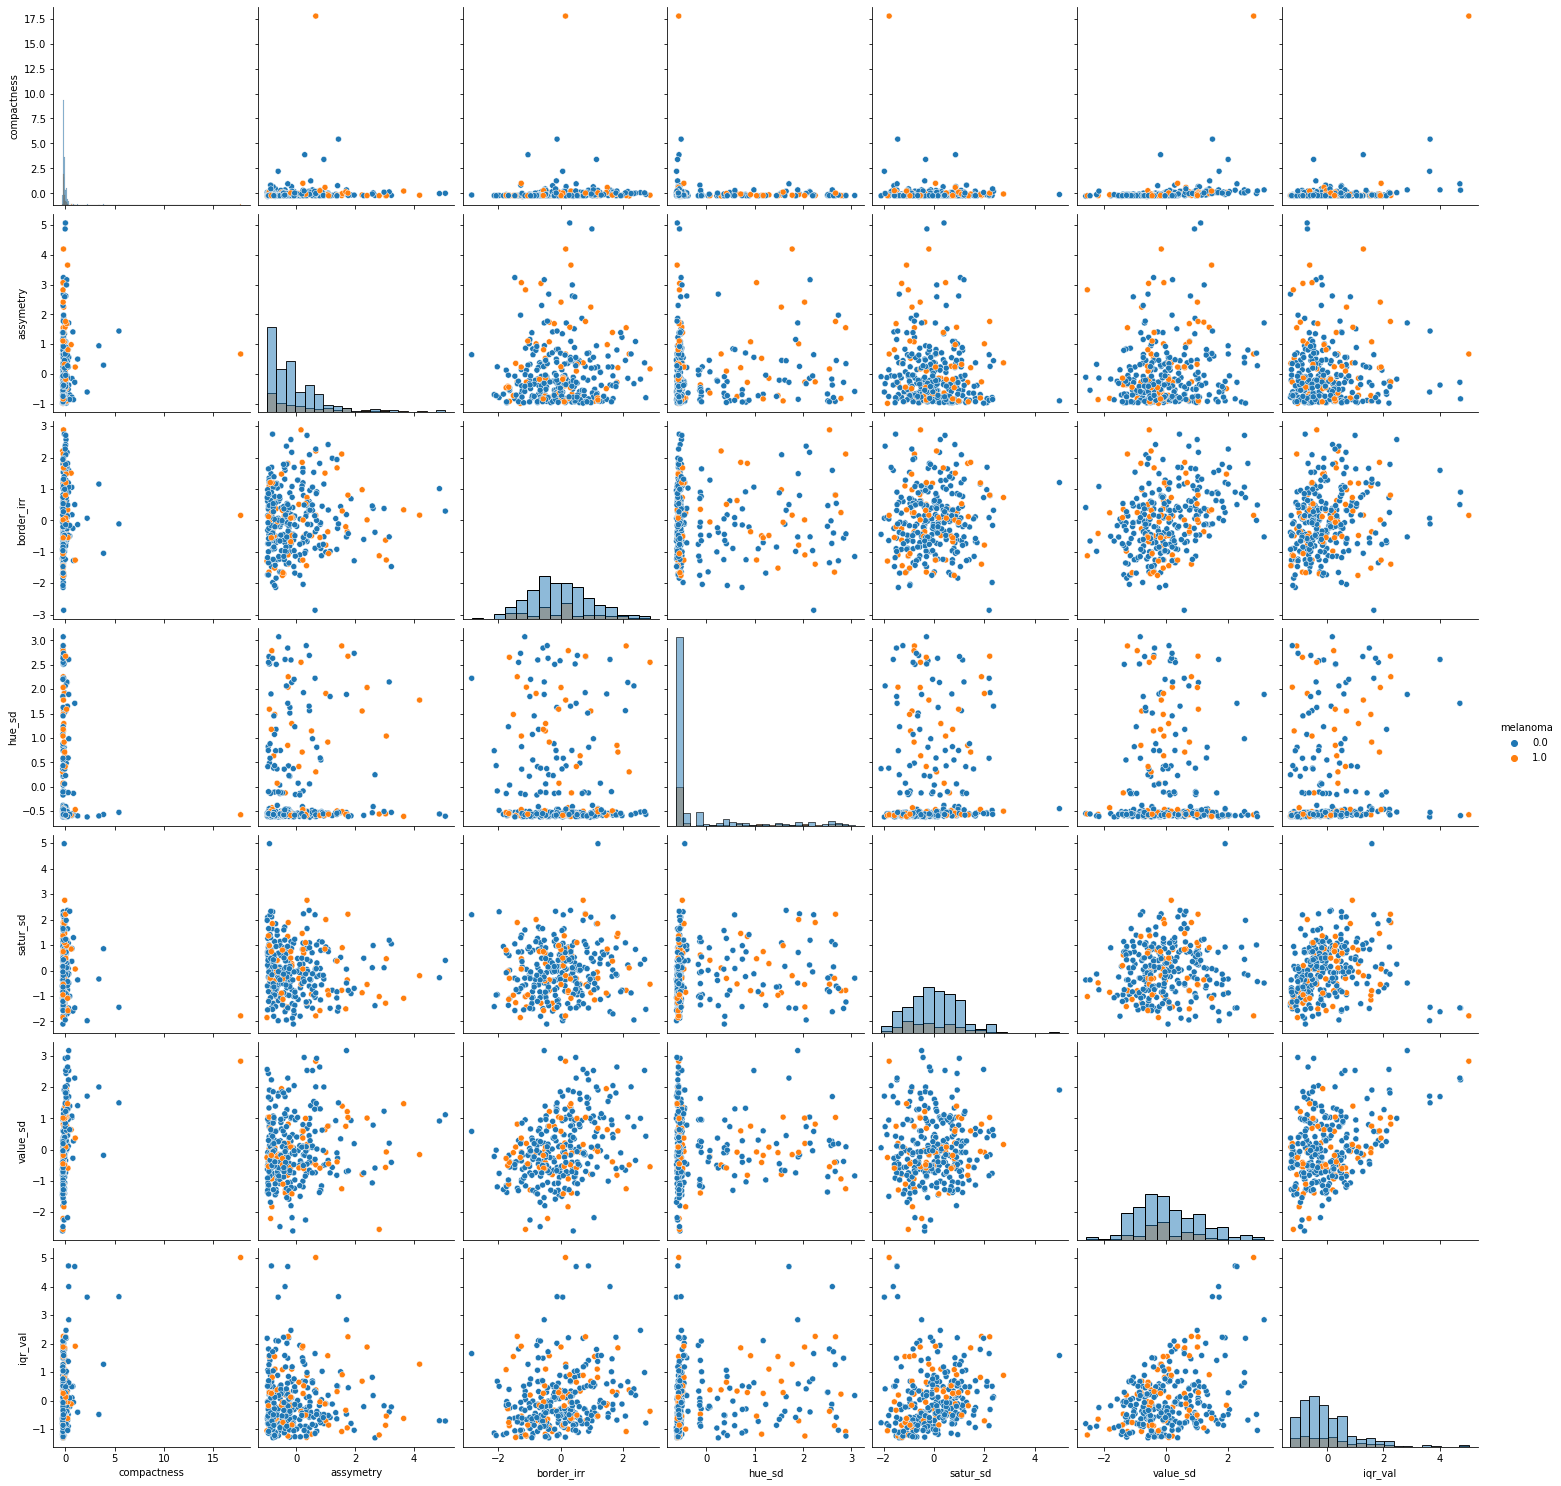

In [25]:
X_train_mel_with_Y = X_train_mel.copy()
X_train_mel_with_Y["melanoma"] = y_train_mel
sns.pairplot(X_train_mel_with_Y, hue="melanoma", height=3, diag_kind="hist");

<h4 style="color:#ff9900">Select K best features</h4>

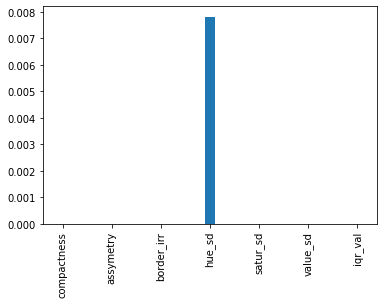

In [26]:
# Get feature scores for melanoma data set
feature_scores_mel, selector_mel = featureScores(X_train_mel, y_train_mel, k=2)

# Get total no. of features
features_mel = len(feature_scores_mel)

# Visualize feature scores
plt.bar(np.arange(0,features_mel), feature_scores_mel, width=.2)
plt.xticks(np.arange(0,features_mel), list(X_train_mel.columns), rotation='vertical')
plt.show()

# Select the two best features based on the selector
X_train_mel_adj = selector_mel.transform(X_train_mel)
X_test_mel_adj = selector_mel.transform(X_test_mel)

<h3 style="color:green">Select and build classifiers</h3>

In [27]:
CLFS = {
    "linear_svc": svm.LinearSVC(max_iter = 5000),
    "knn5": KNeighborsClassifier(n_neighbors=5),
    "DTC": DecisionTreeClassifier(random_state=0, max_depth=5)
}

<h3 style="color:green">Evaluate the results using cross-validation - TRAINING</h3>

In [28]:
crossValidate(X_train_mel_adj, y_train_mel, CLFS)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification

,classifier_name,accuracy,precision,recall,roc_auc
0,linear_svc,0.796875,0.000000,0.000000,0.498039
1,knn5,0.784375,0.233333,0.061538,0.533786
2,DTC,0.746875,0.106667,0.030769,0.495626


<h3 style="color:green">Evaluate the results - TEST DATA</h3>

In [29]:
CLFS_trained_mel = {
    "linear_svc": svm.LinearSVC(max_iter = 5000).fit(X_train_mel_adj, y_train_mel),
    "knn5": KNeighborsClassifier(n_neighbors=5).fit(X_train_mel_adj, y_train_mel),
    "DTC": DecisionTreeClassifier(random_state=0, max_depth=5).fit(X_train_mel_adj, y_train_mel)
}

In [30]:
evaluateTestData(X_test_mel_adj, y_test_mel, CLFS_trained_mel)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,classifier_name,accuracy,precision,recall
0,linear_svc,0.8000,0.0,0.0
1,knn5,0.7125,0.0,0.0
2,DTC,0.6750,0.0,0.0


<h2 style="color:#22198A">Classification of keratosis</h2>

<h3 style="color:green">Load data, normalize it</h3>

In [31]:
# Load the data
FEATURES_UNNORMALIZED_ker = pd.read_csv(path_to_save_ker)

# Separate Image Ids
IMAGE_IDs_ker = FEATURES_UNNORMALIZED_ker['image_id']

# Drop Image Id
FEATURES_UNNORMALIZED_ker = FEATURES_UNNORMALIZED_ker.drop(['image_id'],axis=1)

# Normalize the data
FEATURES_KER = normalizeFeatures(FEATURES_UNNORMALIZED_ker)

<h3 style="color:green">Split the data into training and test</h3>

In [32]:
columns_with_features = list(FEATURES_KER.columns[1:])
columns_with_features

['compactness',
 'assymetry',
 'border_irr',
 'hue_sd',
 'satur_sd',
 'value_sd',
 'iqr_val']

In [33]:
X_train_ker, X_test_ker, y_train_ker, y_test_ker = splitDataIntoTrainTest(FEATURES_KER[columns_with_features], FEATURES_KER.iloc[:, 0])

<h3 style="color:green">Feature selection</h3>

<h4 style="color:#ff9900">Visualize the feature distribution</h4>

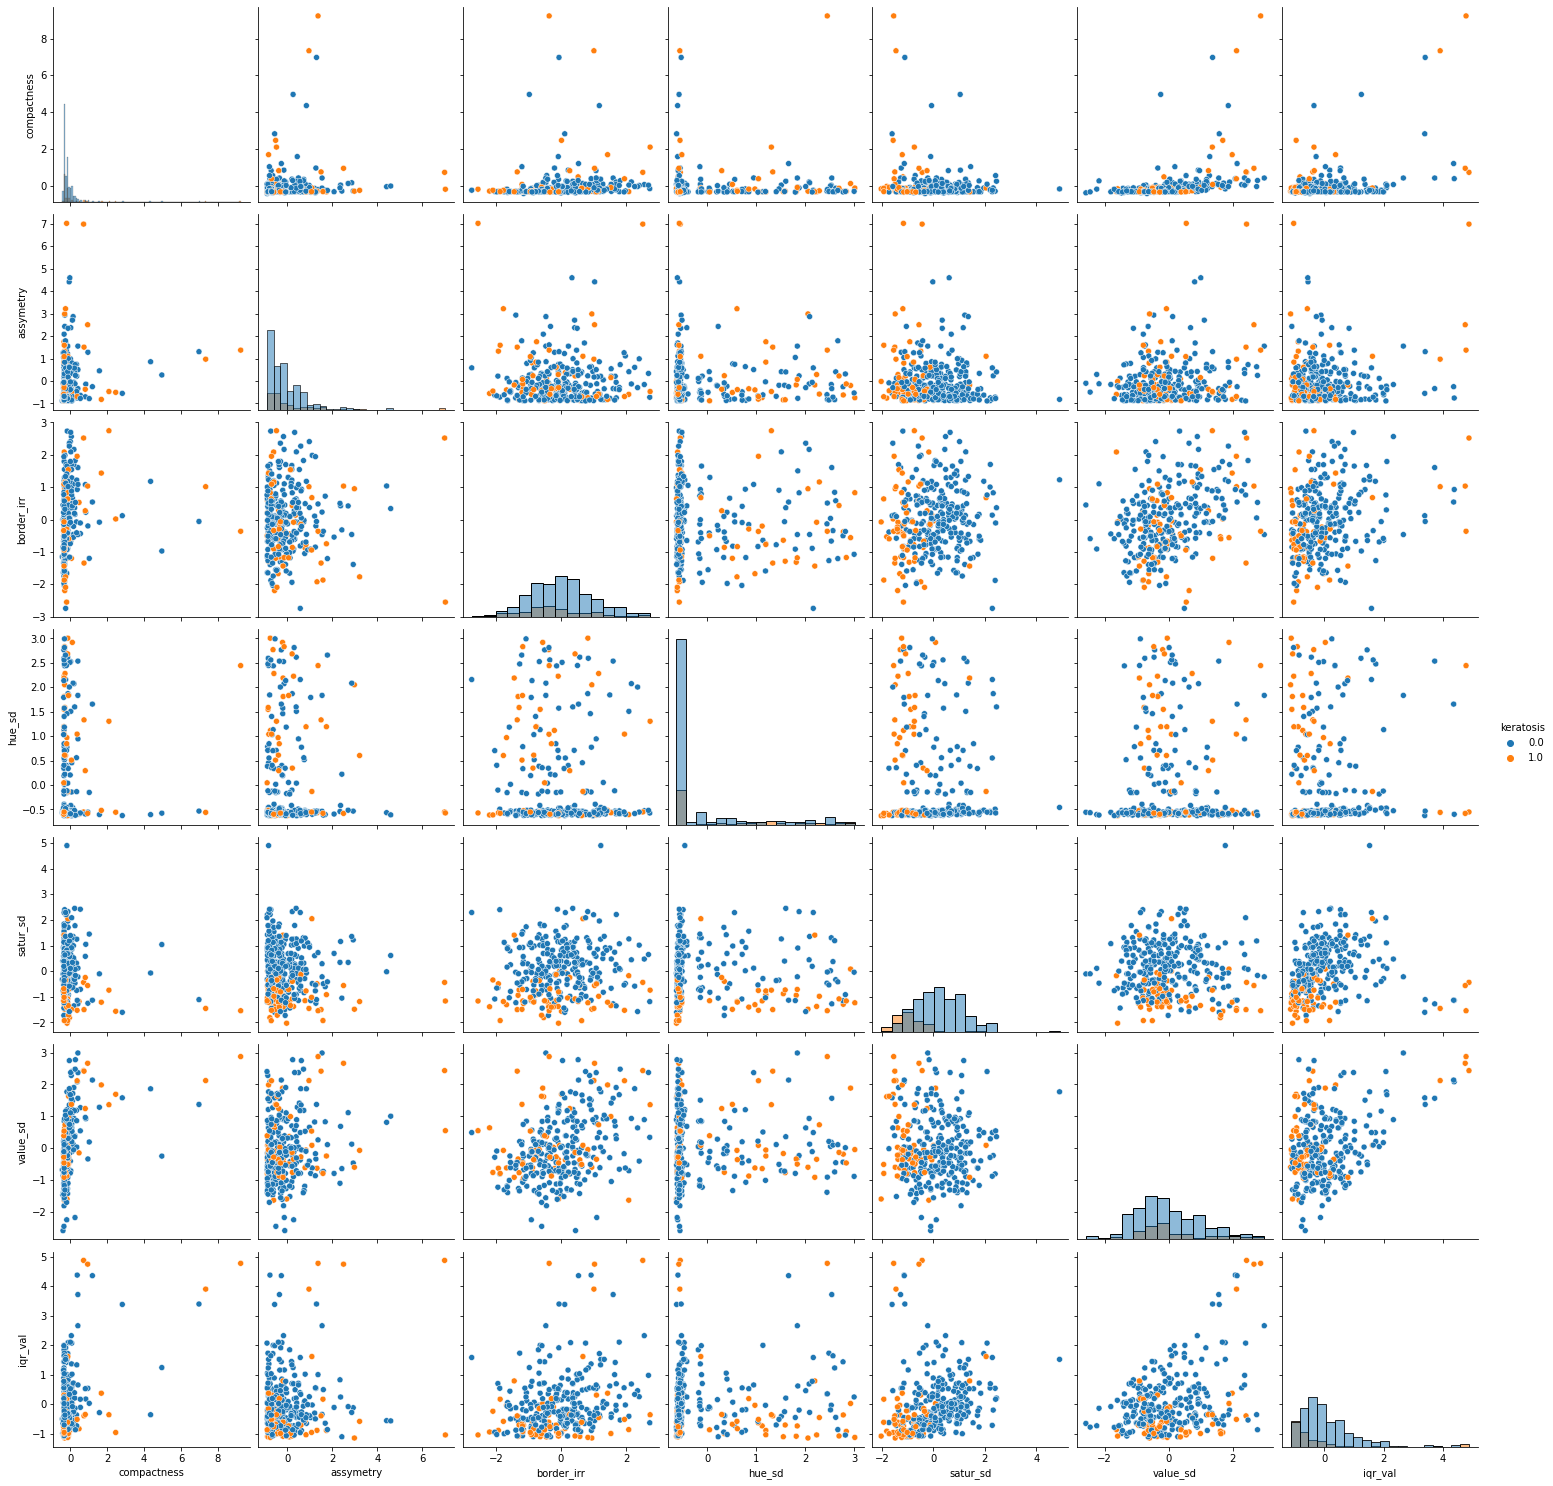

In [34]:
X_train_ker_with_Y = X_train_ker.copy()
X_train_ker_with_Y["keratosis"] = y_train_ker
sns.pairplot(X_train_ker_with_Y, hue="keratosis", height=3, diag_kind="hist");

<h4 style="color:#ff9900">Select K best features</h4>

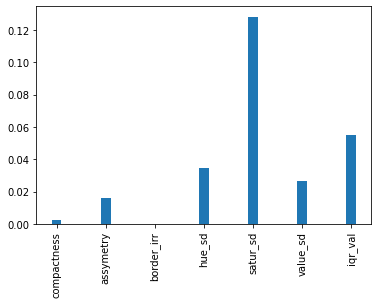

In [35]:
# Get feature scores for melanoma data set
feature_scores_ker, selector_ker = featureScores(X_train_ker, y_train_ker, k=2)

# Get no. of features
features_ker = len(feature_scores_ker)

# Visualize feature scores
plt.bar(np.arange(0,features_ker), feature_scores_ker, width=.2)
plt.xticks(np.arange(0,features_ker), list(X_train_ker.columns), rotation='vertical')
plt.show()

# Select the two best features based on the selector
X_train_ker_adj = selector_ker.transform(X_train_ker)
X_test_ker_adj = selector_ker.transform(X_test_ker)

<h3 style="color:green">Select and build classifiers</h3>

In [36]:
CLFS = {
    "linear_svc": svm.LinearSVC(max_iter = 5000),
    "knn5": KNeighborsClassifier(n_neighbors=5),
    "DTC": DecisionTreeClassifier(random_state=0, max_depth=5)
}

<h3 style="color:green">Evaluate the results using cross-validation - TRAINING</h3>

In [37]:
crossValidate(X_train_ker_adj, y_train_ker, CLFS)

,classifier_name,accuracy,precision,recall,roc_auc
0,linear_svc,0.834375,0.736667,0.369231,0.879638
1,knn5,0.821875,0.600886,0.492308,0.804223
2,DTC,0.821875,0.582857,0.492308,0.738160


<h3 style="color:green">Evaluate the results - TEST DATA</h3>

In [38]:
CLFS_trained_ker = {
    "linear_svc": svm.LinearSVC(max_iter = 5000).fit(X_train_ker_adj, y_train_ker),
    "knn5": KNeighborsClassifier(n_neighbors=5).fit(X_train_ker_adj, y_train_ker),
    "DTC": DecisionTreeClassifier(random_state=0, max_depth=5).fit(X_train_ker_adj, y_train_ker)
}

In [39]:
evaluateTestData(X_test_ker_adj, y_test_ker, CLFS_trained_ker)

,classifier_name,accuracy,precision,recall
0,linear_svc,0.8625,0.777778,0.4375
1,knn5,0.8500,0.750000,0.3750
2,DTC,0.8625,0.727273,0.5000


<h2 style="color:#22198A">Additional plots</h2>

<h3 style="color:green">Figure - model selection</h3>

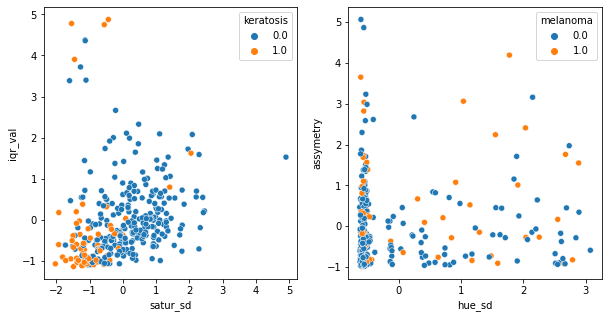

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(x="satur_sd", y="iqr_val", data=X_train_ker_with_Y, hue="keratosis", ax= axs[0]);
sns.scatterplot(x="hue_sd", y="assymetry", data=X_train_mel_with_Y, hue="melanoma", ax= axs[1]);
fig.savefig("figures/model_selection")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a47fbf6-c653-4328-90db-f0771def66a6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>